In [28]:
import pandas as pd
import numpy as np
import cv2
import os
from tqdm import tqdm
from datetime import datetime
import random
import json
import matplotlib.pyplot as plt
import string
from PIL import Image

In [2]:
folder_path = "Images"

In [3]:
image_size = (224,224)

In [4]:
images = []

In [5]:
images_name = []

In [6]:
count = 0
starting_time = datetime.now()

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    try:
        image = cv2.imread(file_path)
        images_name.append(filename)
        image = cv2.resize(image, image_size)
        images.append(image)
        count += 1
        if count % 1000 == 0:
            print(f"Time for {count} iterations is: {datetime.now() - starting_time}")
    except Exception as e:
        print(str(e))

Time for 1000 iterations is: 0:00:02.826718
Time for 2000 iterations is: 0:00:05.932901
Time for 3000 iterations is: 0:00:09.342771
Time for 4000 iterations is: 0:00:14.389154
Time for 5000 iterations is: 0:00:18.574281
Time for 6000 iterations is: 0:00:22.434809
Time for 7000 iterations is: 0:00:26.384172
Time for 8000 iterations is: 0:00:30.098274


In [7]:
df = pd.read_csv("captions.txt", sep=",")

In [8]:
len(images)

8091

In [24]:
df.head()

,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...


In [10]:
first_image = images_name[0]

In [17]:
image_captions = {}

In [18]:
for image_name, image_caption in zip(df["image"], df["caption"]):
    if image_name not in image_captions:
        image_captions[image_name] = image_caption

In [21]:
first_image

'3106026005_473a7b1c8c.jpg'

In [23]:
image_captions[first_image]

'A man sits on a bench on a San Diego street .'

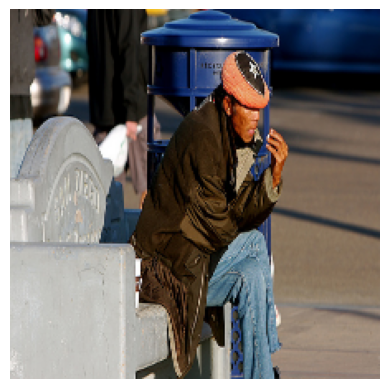

In [30]:
image_rgb = cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis("off")
plt.show()

In [38]:
third_image = images_name[2]

In [39]:
image_captions[third_image]

'A swan unfurling his wings over the water with a second swan in the background .'

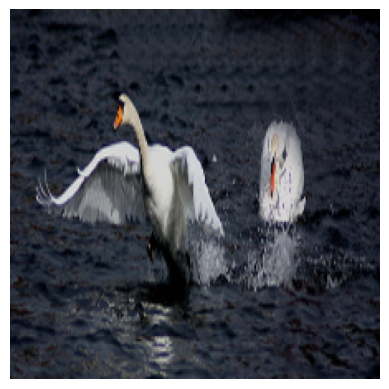

In [40]:
image_rgb = cv2.cvtColor(images[2], cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis("off")
plt.show()

In [44]:
name_image_dict = dict()

In [47]:
for image_name, image_arr in zip(images_name, images):
    if image_name not in name_image_dict:
        name_image_dict[image_name] = image_arr

In [60]:
combined_dict = {key: (image_captions[key], name_image_dict[key]) for key in image_captions if key in name_image_dict}

In [61]:
combined_dict["3106026005_473a7b1c8c.jpg"]

('A man sits on a bench on a San Diego street .',
 array([[[ 62,  68,  79],
         [ 61,  68,  77],
         [ 61,  68,  78],
         ...,
         [ 73,  23,   2],
         [ 72,  23,   2],
         [ 70,  21,   5]],
 
        [[ 59,  66,  75],
         [ 60,  67,  76],
         [ 57,  65,  74],
         ...,
         [ 78,  26,   0],
         [ 75,  24,   0],
         [ 74,  23,   2]],
 
        [[ 60,  68,  75],
         [ 62,  69,  77],
         [ 61,  68,  77],
         ...,
         [ 84,  30,   0],
         [ 79,  29,   0],
         [ 77,  27,   2]],
 
        ...,
 
        [[191, 194, 199],
         [190, 194, 195],
         [208, 212, 213],
         ...,
         [119, 124, 142],
         [115, 123, 140],
         [117, 125, 141]],
 
        [[192, 196, 196],
         [194, 196, 200],
         [192, 195, 199],
         ...,
         [114, 126, 147],
         [115, 125, 146],
         [116, 125, 145]],
 
        [[191, 196, 195],
         [194, 196, 201],
         [195, 198

In [63]:
combined_values = combined_dict.values()

In [71]:
captions = []
images = []

In [72]:
for value in combined_values:
    captions.append(value[0])
    images.append(value[1])

In [73]:
data = {'caption': captions, 'image': images}

In [74]:
df = pd.DataFrame(data)

In [76]:
df.head()

,caption,image
0,A child in a pink dress is climbing up a set o...,"[[[92, 81, 76], [117, 123, 106], [138, 144, 12..."
1,A black dog and a spotted dog are fighting,"[[[105, 100, 99], [106, 101, 100], [112, 104, ..."
2,A little girl covered in paint sits in front o...,"[[[211, 216, 209], [210, 214, 208], [209, 213,..."
3,A man lays on a bench while his dog sits by him .,"[[[207, 238, 246], [215, 241, 250], [217, 239,..."
4,A man in an orange hat starring at something .,"[[[28, 30, 31], [29, 31, 32], [29, 31, 32], [3..."


A child in a pink dress is climbing up a set of stairs in an entry way .
<class 'numpy.ndarray'>


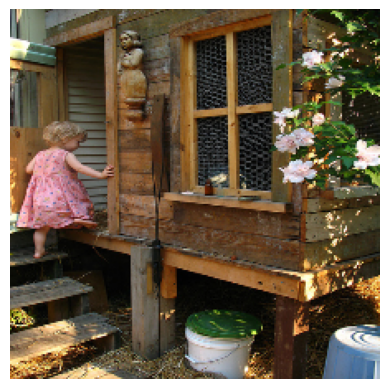

A black dog and a spotted dog are fighting
<class 'numpy.ndarray'>


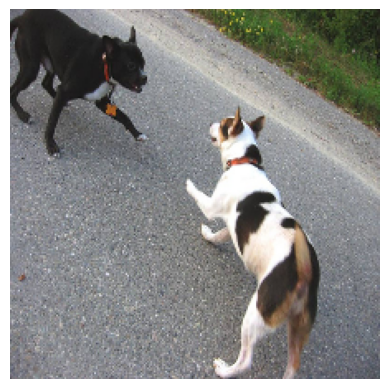

A little girl covered in paint sits in front of a painted rainbow with her hands in a bowl .
<class 'numpy.ndarray'>


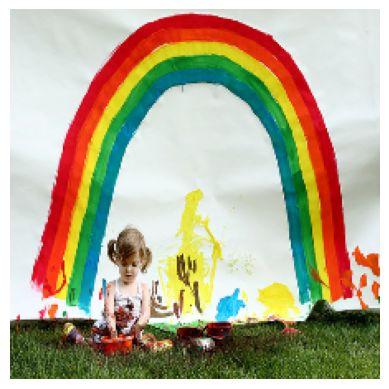

A man lays on a bench while his dog sits by him .
<class 'numpy.ndarray'>


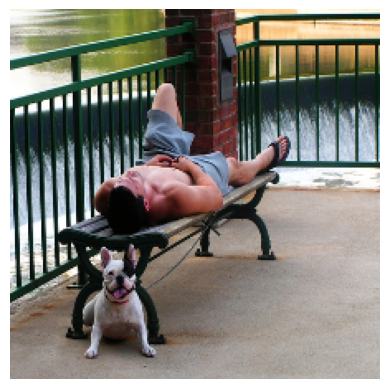

A man in an orange hat starring at something .
<class 'numpy.ndarray'>


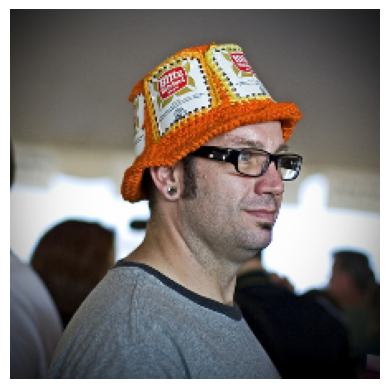

In [84]:
count = 0
for caption, image in zip(df["caption"], df["image"]):
    print(caption)
    print(type(image))
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis("off")
    plt.show()
    count += 1
    if count >= 5:
        break

In [129]:
def remove_punct(sentence):
    result = sentence.translate(str.maketrans("","", string.punctuation))
    return result 

In [130]:
sentence = "hello there."

In [133]:
remove_punct(sentence)

'hello there'

In [145]:
def remove_digit(sentence):
    final_sent = ""
    for word in sentence.split():
        if not word.isdigit():
            final_sent += " "
            final_sent += word
    return final_sent.strip()

In [146]:
sentence = "hello 32 there."

In [148]:
remove_punct(remove_digit(sentence))

'hello there'

In [157]:
def lowercase(sentence):
    return sentence.lower()

In [158]:
sentence = "Hello 32 There."

In [159]:
lowercase(sentence)

'hello 32 there.'

In [165]:
def remove_single_character(sentence):
    final_sent = ""
    for word in sentence.split():
        if len(word) > 1:
            final_sent += " "
            final_sent += word
    return final_sent

In [166]:
sentence = "Hello 2 32 There."

In [167]:
remove_single_character(sentence)

' Hello 32 There.'

In [170]:
def process_text(sentence):
    punct = remove_punct(sentence)
    digit = remove_digit(punct)
    lower = lowercase(digit)
    single = remove_single_character(lower)
    return single.strip()

In [171]:
process_text(sentence)

'hello there'

In [173]:
df["clean_captions"] = df["caption"].apply(lambda x: process_text(x))

In [175]:
df.head()

,caption,image,clean_captions
0,A child in a pink dress is climbing up a set o...,"[[[92, 81, 76], [117, 123, 106], [138, 144, 12...",child in pink dress is climbing up set of stai...
1,A black dog and a spotted dog are fighting,"[[[105, 100, 99], [106, 101, 100], [112, 104, ...",black dog and spotted dog are fighting
2,A little girl covered in paint sits in front o...,"[[[211, 216, 209], [210, 214, 208], [209, 213,...",little girl covered in paint sits in front of ...
3,A man lays on a bench while his dog sits by him .,"[[[207, 238, 246], [215, 241, 250], [217, 239,...",man lays on bench while his dog sits by him
4,A man in an orange hat starring at something .,"[[[28, 30, 31], [29, 31, 32], [29, 31, 32], [3...",man in an orange hat starring at something


In [176]:
df.drop("caption", axis=1, inplace=True)

In [177]:
df.head()

,image,clean_captions
0,"[[[92, 81, 76], [117, 123, 106], [138, 144, 12...",child in pink dress is climbing up set of stai...
1,"[[[105, 100, 99], [106, 101, 100], [112, 104, ...",black dog and spotted dog are fighting
2,"[[[211, 216, 209], [210, 214, 208], [209, 213,...",little girl covered in paint sits in front of ...
3,"[[[207, 238, 246], [215, 241, 250], [217, 239,...",man lays on bench while his dog sits by him
4,"[[[28, 30, 31], [29, 31, 32], [29, 31, 32], [3...",man in an orange hat starring at something
